In [ ]:
from product import Option
from strategy import *
from euronext import Page
from graph import Graph
g=Graph(4800, 5500, 25)

In [ ]:
p = Page()
p.fetch()
options = p.scrap_options()
call = p.call
put = p.put
for k, o in p.call.items():
    o.multiplier=10
for k, o in p.put.items():
    o.multiplier=10


In [35]:
g.display_page_raw(p)

Settl.C,OIC,Day Vol C,Last C,bid C,ask C,C,strike,P,bid P,ask P,Last P,Day Vol P,OIP,Settl.P
1101.55,-,-,-,1070.10,1079,C,4000,P,-,0.3,-,-,568,0.01
901.55,-,-,-,870.10,879,C,4200,P,-,0.3,-,-,485,0.01
701.62,-,-,-,670.20,679.1,C,4400,P,-,0.4,-,-,"1,069",0.1
601.7,-,-,-,570.20,579.1,C,4500,P,-,0.4,-,-,719,0.18
551.75,-,-,-,520.20,529.2,C,4550,P,-,0.5,-,-,63,0.23
501.8,-,-,-,470.30,479.2,C,4600,P,-,0.5,0.20,1,990,0.28
451.87,-,-,-,420.30,429.3,C,4650,P,-,0.6,-,-,70,0.35
401.96,-,-,-,370.50,379.5,C,4700,P,0.10,0.7,0.80,35,927,0.44
352.22,-,-,-,320.60,329.7,C,4750,P,0.30,0.9,-,-,117,0.71
302.27,9,-,-,270.90,280,C,4800,P,0.60,1.3,0.80,61,758,0.76


In [ ]:
# test data when interet is fall
import numpy as np
sT = np.arange(4800,5400,25)
o = Option(strike=4900, achat=212.40, vente=219.40, multiplier=10)
c = Option(cat='Call', strike=4900, achat=212.40, vente=219.40, multiplier=10)
p = Option(cat='Put', strike=4900, achat=9.10, vente=11.60, multiplier=10)
print(str(o));print(str(c));print(str(p))

In [ ]:
s2 = Strategy('Strategy : call+2*put long').add(call[4900], 'long', 1).add(call[5300], 'short', 2)
g.profit(call[4950], 'long')
g.profit_strategy(s2)
g.compare(call[5000], 'long', s2, 'long')

In [ ]:
butterfly = (Strategy('Butterfly C5000-2*C5100+C5200')
             .add(call[5000], 'long', 1)
             .add(call[5100], 'short', 2)
             .add(call[5200], 'long', 1))
call_strike = 5000
g.profit_strategy(butterfly)
g.compare(call[call_strike], 'long', butterfly, 'long')
print('Cost-Butterfly : {:0.02f}€'.format(butterfly.cost()))
print('Cost-Call : {:0.02f}€'.format(call[call_strike].cost('long')))
g.display_summary(butterfly)

Ratio : 20.1/2.2 ~ 10
Ratio Backspreads Cost : -19.00€


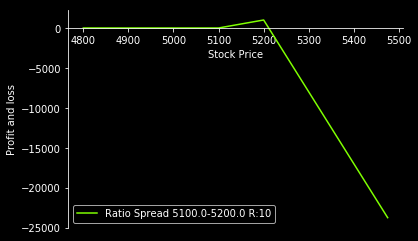

Ratio : 20.1/2.2 ~ 3
Ratio Backspreads Cost : 135.00€


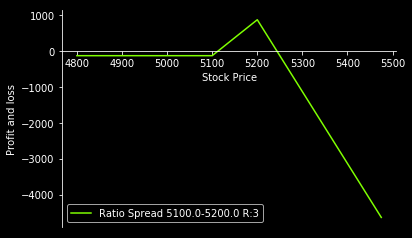

Compare Ratio Backspreads with simple Call long
Ratio Backspreads Cost : 135.00€
Call 5000 Cost : 1731.00€


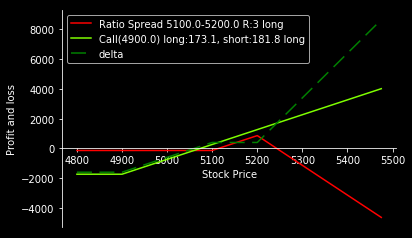

Ratio Spread 5100.0-5200.0 R:10


Category,strike,direction,Quantity,Cost
Call,5100,long,1,201
Call,5200,short,10,-220


Ratio Spread 5100.0-5200.0 R:3


Category,strike,direction,Quantity,Cost
Call,5100,long,1,201
Call,5200,short,3,-66


In [30]:
#ratio-spreads
rspread2 = RatioSpread(call[5100], call[5200])
print('Ratio Backspreads Cost : {:0.02f}€'.format(rspread2.cost()))
g.profit_strategy(rspread2)

ratio_backspreads = RatioSpread(call[5100], call[5200], ratio=3)
print('Ratio Backspreads Cost : {:0.02f}€'.format(ratio_backspreads.cost()))
g.profit_strategy(ratio_backspreads)

print('Compare Ratio Backspreads with simple Call long')
print('Ratio Backspreads Cost : {:0.02f}€'.format(ratio_backspreads.cost()))
print('Call 5000 Cost : {:0.02f}€'.format(call[4900].cost('long')))
g.compare(ratio_backspreads, 'long', call[4900], 'long')

print(rspread2.label)
g.display_summary(rspread2)
print(ratio_backspreads.label)
g.display_summary(ratio_backspreads)

Straddle Cost : -2194.0


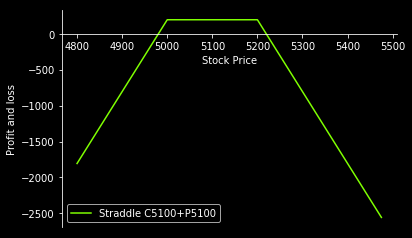

Compare Straddle with simple Put short
Ratio Backspreads Cost : 135.00€
Put 5000 Cost : -119.00€


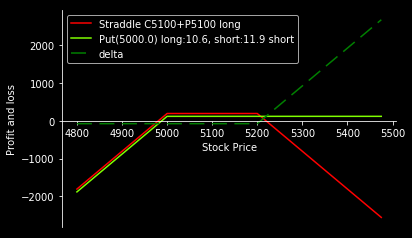

Category,strike,direction,Quantity,Cost
Call,5000,short,1,-877
Put,5200,short,1,-1317


In [31]:
straddle = (Strategy('Straddle C5100+P5100')
             .add(call[5000], 'short', 1)
             .add(put[5200], 'short', 1))
print('Straddle Cost : {}'.format(straddle.cost()))
g.profit_strategy(straddle)
{'min': min(straddle.payoff(g.sT, 'long')),
 'max': max(straddle.payoff(g.sT, 'long')),
 'cost': straddle.cost()}


print('Compare Straddle with simple Put short')
print('Ratio Backspreads Cost : {:0.02f}€'.format(ratio_backspreads.cost()))
print('Put 5000 Cost : {:0.02f}€'.format(put[5000].cost('short')))
g.compare(straddle, 'long', put[5000], 'short')

g.display_summary(straddle)


In [32]:
for s, c in call.items():
    print('{} {} {}'.format(c.strike, c.multiplier, c.vente))

4700.0 10 379.5
4750.0 10 329.7
4800.0 10 280.0
4825.0 10 255.3
4850.0 10 230.6
4875.0 10 206.1
4900.0 10 181.8
4925.0 10 156.7
4950.0 10 133.1
4975.0 10 110.2
5000.0 10 87.7
5025.0 10 67.5
5050.0 10 49.1
5075.0 10 33.8
5100.0 10 21.5
5125.0 10 13.1
5150.0 10 7.3
5175.0 10 3.9
5200.0 10 2.2
5225.0 10 1.4
5250.0 10 0.7
5300.0 10 0.5


In [ ]:
strat1 = (Strategy('Stratis 5100-..-5300 croissant')
             .add(put[5000], 'short', 3)
             .add(put[5100], 'short', 2)
             .add(put[5200], 'short', 1)
        )
strat2 = (Strategy('Stratis 5100-..-5300 decroissant')
             .add(put[5000], 'short', 1)
             .add(put[5100], 'short', 2)
             .add(put[5200], 'short', 3)
        )
print('{} Cost : {}'.format(strat1.label, strat1.cost()))
print('{} Cost : {}'.format(strat2.label, strat2.cost()))
g.profit_strategy(strat1)
g.profit_strategy(strat2)
g.compare(strat1, 'long', strat2, 'long')

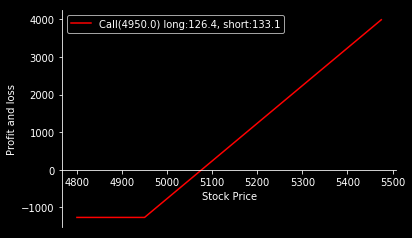

cost: 1264.0


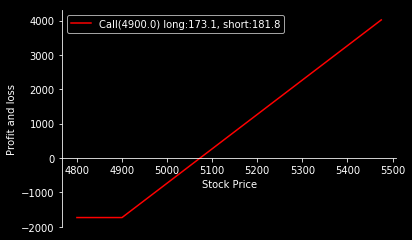

cost: 1731.0


In [33]:
g.profit(call[4950], 'long')
print('cost: {}'.format(call[4950].cost('long')))
g.profit(call[4900], 'long')
print('cost: {}'.format(call[4900].cost('long')))


Box Spread 5100.0-5200.0 Cost : 1614.0
Box Spread 5150.0-5200.0 Cost : 785.0


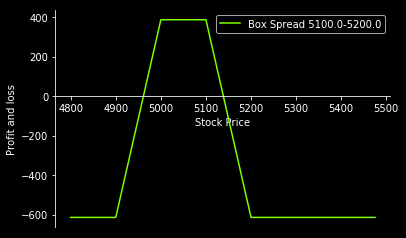

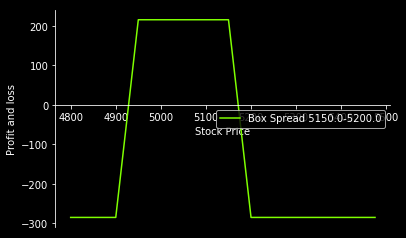

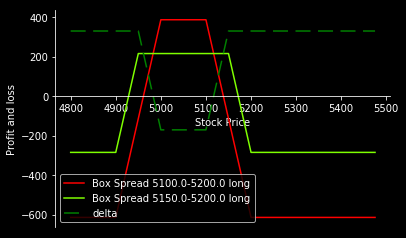

Category,strike,direction,Quantity,Cost
Call,5000,short,1,-877
Call,4900,long,1,1731
Put,5100,short,1,-480
Put,5200,long,1,1240


In [34]:
bspread2 = BoxSpread(call[5000], call[4900], put[5100], put[5200])
print('{} Cost : {}'.format(bspread2.label, bspread2.cost()))
bspread1 = BoxSpread(call[4950], call[4900], put[5150], put[5200])
print('{} Cost : {}'.format(bspread1.label, bspread1.cost()))
g.profit_strategy(bspread2)
g.profit_strategy(bspread1)
g.compare(bspread2, 'long', bspread1, 'long')
g.display_summary(bspread2)

Call Spread 4900.0-5000.0 Cost : 854.0
Call Spread 4900.0-5150.0 Cost : 1658.0


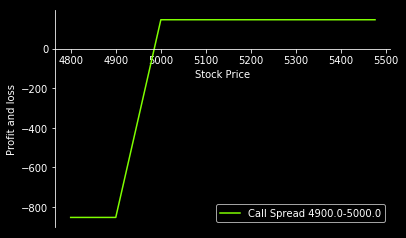

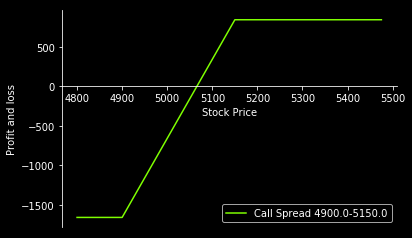

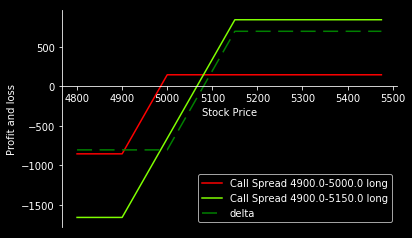

In [36]:
cspread1 = CallSpread(call[4900], call[5000])
print('{} Cost : {}'.format(cspread1.label, cspread1.cost()))
cspread2 = CallSpread(call[4900], call[5150])
print('{} Cost : {}'.format(cspread2.label, cspread2.cost()))
g.profit_strategy(cspread1)
g.profit_strategy(cspread2)
g.compare(cspread1, 'long', cspread2, 'long')

In [ ]:
pspread1 = PutSpread(put[5200], put[5000])
print('{} Cost : {}'.format(pspread1.label, pspread1.cost()))
g.profit_strategy(pspread1)
pspread2 = PutSpread(put[5100], put[5000])
print('{} Cost : {}'.format(pspread2.label, pspread2.cost()))
g.profit_strategy(pspread2)
g.compare(pspread1, 'long', pspread2, 'long')

In [ ]:
ironcondor = IronCondor(put[5050], put[5000], call[5250], call[5300])
print('{} Cost : {}'.format(ironcondor.label, ironcondor.cost()))
risk = min(ironcondor.payoff(g.sT, 'long'))
print('{} Risk : {}'.format(ironcondor.label,risk))
g.profit_strategy(ironcondor)
g.display_summary(ironcondor)

In [ ]:
help(IronCondor)